## How did the pandemic affect different categories of consumption?

- by Tao Wang 


The ongoing pandemic and succeeding lock-down policies caused a dramatic collapse in consumption. One special feature of the consumption dynamics during this crisis has been that the responses varied greatly across different sectors. In particular, the consumption categories that bear a high risk of infection, such as contact-based service, i.e. haircut, eating/drinking outside, and travel saw substantial contraction since the onset of the pandemic. In contrast, those which are less exposed to the shock or considered as necessities such as grocery shopping and alcohol/cigarettes, etc, performed robustly well and even picked up during this same period.

Broadly, in many macroeconomic contexts, it is important to examine not only the total consumption (or the total non-durable consumption), but also the compositional changes in consumption in response to income/taste /uncertainty shocks. 

In this notebook, we use the existing HARK toolkit to illustrate how we can tackle such a problem in a highly stylized setting.

### The nature of the problem: intra-temporal allocation and inter-temporal choice combined

In most of the inter-temporal consumption/saving problems we have studied, we assume there is only one kind of good to be consumed, or implicitly a composite index is used to represent the consumption bundle of differentiated goods. In order for us to capture compositional dynamics of consumption, we need to make the consumption allocation across different sectors explicit in an inter-temporal problem. 

We assume the composite $c_t$ at each time period is itself of an aggregated consumption bundle of two types of goods, the contact-based and non-contact-based. We denote the two as $c$ and $n$ in subscripts, separately. (We focus on the 2-sector case for illustration. But it can be easily generalized to $n$ sectors). 

One of the most commonly used aggregate functions of sub-category consumption takes the form of constant elasticity of substitution (CES). Two parameters determine the relationship between the two categories. The first is the elasticity of substitution (EOS) $\epsilon$. The second is the relative preference weight given to the two sectors, $\phi$ and $1-\phi$, respectively. Notice there is an additional term a taste shock $z_t$ that will be driven by the pandemic in a way to be specified later. 

\begin{equation}
c_t = (z_t\phi c_{c,t}^{1-1/\epsilon} + (1-\phi) c_{n,t}^{1-1/\epsilon})^{1/(\epsilon-1)}
\end{equation}

The consumption bundle $c_t$ enters a CRRA utility with the relative risk aversion $\rho$. And the consumer maximizes the expected life-long utility with discount rate $\beta$ by choosing the consumption streams of two goods in each period. 

\begin{equation}
\begin{split}
\underset{\{c_{c,t},c_{n,t}\}}{max}  \quad  E_0 \sum^{+\infty}_{t = 0}\beta^t u(c_t)  \\
u(c_t) = \frac{c_t^{1-\rho}}{1-\rho} \\
\end{split}
\end{equation}

subject to the inter-temporal budget constraint. 

\begin{equation}
\begin{split}
a_t = y_t - c_tp_t \\
b_{t+1} = a_t R  \\
m_{t+1} = b_{t+1} + y_{t+1}
\end{split}
\end{equation}

where the only modification compared to a one-sector problem is that we include the time-specific price index $p_t$. $p_t$ is a price index that transforms the individual price indices $p_{c,t}$ and $p_{n,t}$ into a composite index such that $c_tp_t$ is exactly equal to the minimized total spending to achieve $c_t$, which is the minimizor of of $c_{n,t}p_{n,t}+ c_{c,t}p_{c,t}$ subject to $c_t \leq c_t(c_{c,t},c_{n,t})$. This is a special property of the CES demand system. More generally, we can write $c_tp_t$ as an expenditure function of $c_t$ and price vectors.   


Finally, we assume that the consumer is faced with idiosyncratic income risks and it has a fully permanent component and transitory component. 


\begin{equation}
\begin{split}
y_t = l_t + \xi_t \\
l_t = l_{t-1} + \theta_t  \\
\xi_t \sim N(0,\sigma^2_{\xi}) \\
\theta_t \sim N(0,\sigma^2_{\theta})
\end{split}
\end{equation}

where $y_t$ is the labor income. $l_t$ is the permanent income and $\xi_t$ and $\theta_t$ are the transitory and permanent income shock, respectively. Both are i.i.d. with time-invariant shocks. 

Borrowing constraint is imposed as well, the asset to permanent income ratio cannot be below than a ratio $\bar a$. 

\begin{equation}
\frac{a_t}{l_t} \geq \bar a \quad \forall t
\end{equation}


###  The pandemic 

The pandemic affects the consumption via two channels. 

First, the pandemic as an idiosyncratic negative income shock that could be either permanent or transitory.   

Second, the pandemic as a taste shifter that negatively hit $z_t$, bringing down the weight the consumer assigns to contact-based consumption category. 

### Two-stage budgeting 


It seems that the new problem now has a non-trivial change in structure since the problem involves both inter-temporal choice and intra-temporal decisions. But fortunately, this is a case where the conditions for the two-stage budgeting principle hold. Specifically, the cross-period utilities are additively separable while the within-period utility is simply a monotonically increasing transformation of a homothetic function. So we can separate the inter-temporal and intra-temporal problems from each other and solve them sequentially. 

Specifically, the inter-temporal problem is still characterized by the value function associated with the state variables. It is just that the implicit control variable is $c_t$ the bundel as a whole. This is equivalent to allocating life-long resources across different periods. Once the buget is allocated to a specific period, the maximized value associated with that spending is determined by the intra-temporal allocation. 


In the first stage, we solve the intra-temporal allocation. Given any optimal $c_t$ to be pinned down in the second stage, we solve within-period allocation based on the relative price and marginal rate of substitution (MRS). 


\begin{equation}
\begin{split}
\frac{c'_{c,t}}{c'_{n,t}} =\frac{z_t\phi}{(1-\phi)}(\frac{c_{c,t}}{c_{n,t}})^{-1/\epsilon} =\frac{p_{c,t}}{p_{n,t}}
\end{split}
\end{equation}


In the second stage, given being optimal within each period, we solve the inter-temporal problem. The Bellman equation writes below. 

\begin{equation}
V_t(m_t, l_t) =  \underset{\{c_t\}}{max} \quad u(c_{t+1}) + \beta E_{t}[V_{t+1}(m_{t+1}, l_{t+1})] 
\end{equation}

By normalizing both $m_t$ and $c_t$ with the permanent income level $l_t$, we reduce the problem to one control variable again. Then the Bellman equation takes us to the familiar Euler equation in combining the Envelope Theorem.

\begin{equation}
E_{t}[\frac{u'(\frac{c_{t+1}}{l_{t+1}}){p_{t+1}}}{\beta R}] =p_{t} u'(\frac{c_{t}}{l_t}) 
\end{equation}




### HARK Implementation

- This second stage inter-temporal problem can be solved using the $\texttt{IndShockConsumerType}$ class in HARK with two small chnages. The class produces consumption functions in an infinite horizon under idiosyncratic income risks.
  - Converting period-specific price vectors into a price index and compute the price inflation, $\frac{p_{t+1}}{p_t}$, using the following fomular. (See Appendix for derivation) 
  
  \begin{equation}
  p_t = (z_t\phi p_{c,t}^{1-\epsilon}+ (1-\phi) p_{n,t}^{1-\epsilon})^{1/(1-\epsilon)}
  \end{equation}
  
  - The price inflation is subtracted from the nominal interest rate of $R$ to get the real interest rate, that is used in HARK as the real interest factor. 
  
  \begin{equation}
  \bar R \equiv R \frac{p_{t}}{p_{t+1}}
  \end{equation}
  
  
  
- The intra-temporal problem is solved by an additionally written function that takes $c_t$, price vectors and preference parameters as given and produces respective demands for two goods given the asset level. 

In [1]:
## HARK 
from HARK.ConsumptionSaving.ConsIndShockModel import IndShockConsumerType
from HARK.utilities import plotFuncs

## other 
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

In [66]:
# Choose some calibrated parameters that roughly match steady state 
init_infinite = {
    "CRRA":1.0,                    # Coefficient of relative risk aversion 
    "Rfree":1.01/(1.0 - 1.0/240.0), # Real interest rate factor,
    "PermGroFac":[1.000**0.25], # Permanent income growth factor (no perm growth),
    "PermGroFacAgg":1.0,
    "BoroCnstArt":0.0,
    "CubicBool":False,
    "vFuncBool":False,
    "PermShkStd":[(0.01*4/11)**0.5],  # Standard deviation of permanent shocks to income
    "PermShkCount":7,  # Number of points in permanent income shock grid
    "TranShkStd":[(0.01*4)**0.5],  # Standard deviation of transitory shocks to income,
    "TranShkCount":5,  # Number of points in transitory income shock grid
    "UnempPrb":0.07,  # Probability of unemployment while working
    "IncUnemp":0.15,  # Unemployment benefit replacement rate
    "UnempPrbRet":None,
    "IncUnempRet":None,
    "aXtraMin":0.00001,  # Minimum end-of-period assets in grid
    "aXtraMax":20,      # Maximum end-of-period assets in grid
    "aXtraCount":20,    # Number of points in assets grid
    "aXtraExtra":[None],
    "aXtraNestFac":3,  # Number of times to 'exponentially nest' when constructing assets grid
    "LivPrb":[1.0 - 1.0/240.0],  # Survival probability
    "DiscFac":0.97,             # Default intertemporal discount factor, # dummy value, will be overwritten
    "cycles":0,               ## Infinite horizon
    "T_cycle":1,             
    "T_retire":0,
    'T_sim':800,        # Number of periods to simulate (idiosyncratic shocks model, perpetual youth)
    'T_age':1000,
    'IndL': 10.0/9.0,  # Labor supply per individual (constant),
    'aNrmInitMean':np.log(0.00001),
    'aNrmInitStd':0.0,
    'pLvlInitMean':0.0,
    'pLvlInitStd':0.0,
    'AgentCount':10000,
}

In [67]:
## Initialize a consumer type 

BasicType = IndShockConsumerType(**init_infinite)

In [68]:
## set parameters 

BasicType.Rfree = 1.01

## solve

BasicType.solve(verbose=False)
    
# Now simulate many periods to get to the stationary distribution
BasicType.T_sim = 2000
BasicType.initializeSim()
BasicType.simulate()

In [5]:
print(list(vars(BasicType.solution[0])))

['cFunc', 'vFunc', 'vPfunc', 'vPPfunc', 'mNrmMin', 'hNrm', 'MPCmin', 'MPCmax']


Consumption function for an idiosyncratic shocks consumer type:


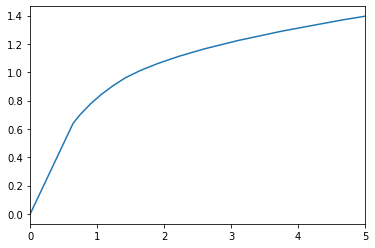

In [6]:
print('Consumption function for an idiosyncratic shocks consumer type:')
plotFuncs(BasicType.solution[0].cFunc,BasicType.solution[0].mNrmMin,5)

In [79]:
### An extended class that solves intra-temporal problem
### It inherites from IndShockConsumerType and adds additional methods and features necessary for the 
#### intra-temporal problem

class IndShockConsumer2StageType(IndShockConsumerType):
    def __init__(self,
               eps = 2,         ## EOS between goods 
               phi = 0.5,       ## preference weights to sector 1 good
               z_shock = 1,     ## taste shock to the sector 1
               TasteShkStd = 0.1,  ## size of taste shocks. not used now. 
               p_vec = (1,1)):      ## price vectors for a given period. 
        
        ## these are additional inputs for the new class
        
        self.eps, self.phi, self.z_shock = eps, phi, z_shock
        self.p_vec = p_vec
        
        # invoking the __init__ of the parent class  
        IndShockConsumerType.__init__(self,
                                      **init_infinite) 
    
    def c_composite(self,
                    c_vec):
        ## composite consumption 
        
        phi = self.phi
        eps = self.eps 
        z_shock = self.z_shock
        
        c_bundle = (z_shock*phi*c[0]**(1-1/eps)+(1-phi)*c[1]**(1-1/eps))**(1/(eps-1))
        
        return c_bundle 
    
    def p_composite(self,
                   z_shock):
        p_vec = self.p_vec
        phi, eps = self.phi, self.eps
        ## composite price index 
        p_idx = ((z_shock*phi)**eps*p_vec[0]**(1-eps)+(1-phi)**eps*p_vec[1]**(1-eps))**(1/(1-eps))
        return p_idx
    
    def allocate(self,
                 c_bundle,
                 z_shock):
        ## this function allocates the consumption bundle to different sectors using the convenient fact about CES 
        phi,eps= self.phi, self.eps
        p_vec = self.p_vec
        Pidx = self.p_composite(z_shock)
        
        c1 = (z_shock*phi)**eps*p_vec[0]**(-eps)/Pidx**(1-eps)*c_bundle ## a fraction of c_bundle 
        c2 =(1-phi)**eps*p_vec[1]**(-eps)/Pidx**(1-eps)*c_bundle  ## 1-the fraction 
        
        c_sol =np.array([c1,c2])
        return c_sol
    
    def solve_intra(self):
        allocate = self.allocate
        cFunc = self.solution[0].cFunc
        DemandFunc = lambda x,z: self.allocate(cFunc(x),z)
        self.solution[0].DemandFunc = DemandFunc 
        ## this is a demand function at asset level and taste shock value 

In [80]:
## initialize an instance of the new class 

NewType = IndShockConsumer2StageType()

In [81]:
## first solve the inter-temporal problem 
## second solve the intra-temporal problem 

NewType.solve(verbose=False)
NewType.solve_intra()

In [ ]:
print(list(vars(NewType.solution[0])))

In [82]:
## the use the demand function to compute some 
##    demands for two goods at different asset grids and taste shock values

mNrmMin = np.linspace(0.01,4,20) ## asset grid
z_shocks = np.array([0.3,0.5,1]) 

d_func = np.array([NewType.solution[0].DemandFunc(mNrmMin,z) for z in z_shocks])

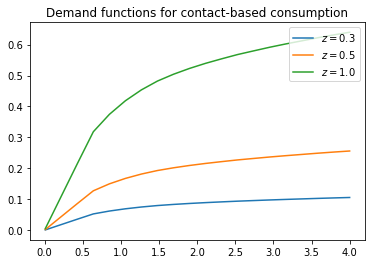

In [83]:
## ## contact based consumption 

n_z = d_func.shape[0]

for i in range(n_z):
    plt.plot(mNrmMin,d_func[i,0], label =r'$z=$'+str(z_shocks[i]))
    #plt.plot(mNrmMin,d_func[1],label =r'$c_n$')
    plt.title('Demand functions for contact-based consumption')
plt.legend(loc=1)

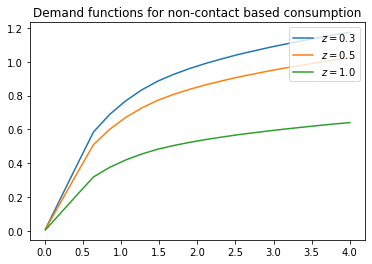

In [84]:
## non-contact based consumption 

for i in range(n_z):
    plt.plot(mNrmMin,d_func[i,1], label =r'$z=$'+str(z_shocks[i]))
    plt.title('Demand functions for non-contact based consumption')
plt.legend(loc=1)

In [85]:
## Simulate the distribution 
NewType.track_vars = ['aNrmNow','mNrmNow','cNrmNow','pLvlNow']
NewType.initializeSim()
NewType.simulate()

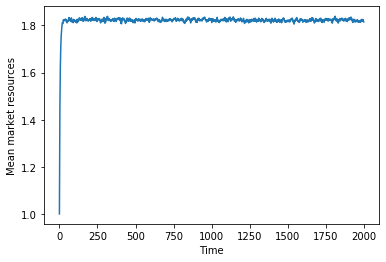

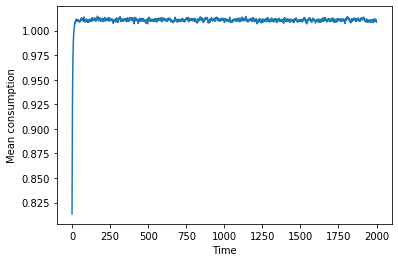

In [86]:
plt.plot(np.mean(NewType.cNrmNow_hist,axis=1))
plt.xlabel('Time')
plt.ylabel('Mean consumption')
plt.show()

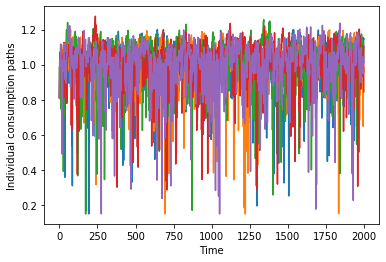

In [78]:
plt.plot(NewType.cNrmNow_hist[:,0:5])
plt.xlabel('Time')
plt.ylabel('Individual consumption paths')
plt.show()